x-Werte:   [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y-Werte:   [0.         0.09       0.17666667 0.26333333 0.34666667 0.34333333
 0.52833333 0.625      0.73333333 0.81666667 0.90166667]
y-Fehler:  [0.00833333 0.00887333 0.00939333 0.00991333 0.01041333 0.01039333
 0.01150333 0.01208333 0.01273333 0.01323333 0.01374333]
x-Werte:   [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y-Werte:   [0.         0.02166667 0.065      0.09666667 0.13166667 0.16333333
 0.21666667 0.29166667 0.36833333 0.55333333 0.83166667]
y-Fehler:  [0.00833333 0.00846333 0.00872333 0.00891333 0.00912333 0.00931333
 0.00963333 0.01008333 0.01054333 0.01165333 0.01332333]


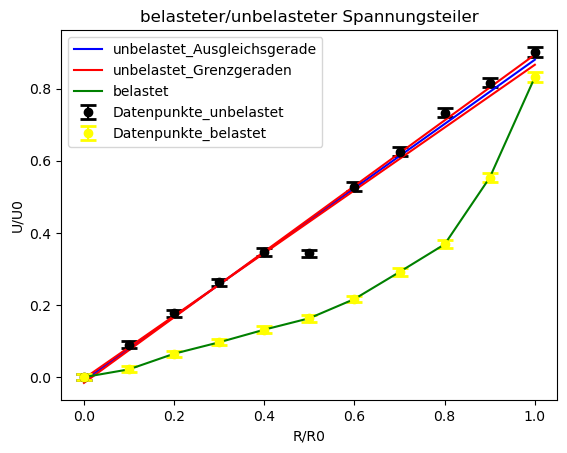

Der y-Achsenabschnitt beträgt -0.01 ± 0.006 .
Die Geradensteigung beträgt 0.89 ± 0.02 .
Das Bestimmtheitsmaß R^2 beträgt 98.7 .
Die Varianz beträgt 10.6 .


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Rundung import *

xwerte1,ywerte1=np.loadtxt('A2_unbelastet.txt',delimiter=',').T
xwerte=xwerte1/10
ywerte=ywerte1/6
yfehler=(0.006*ywerte1+0.05)/6




print("x-Werte:  ",xwerte)
print("y-Werte:  ",ywerte)
print("y-Fehler: ",yfehler)

def support(xwerte,ywerte,yfehler):             
    
    x2=0                                         #Summe über (x^2)/(sigma^2)
    for i in range(len(xwerte)):                 #gehe über alle Werte
        x2 += (xwerte[i]**2) / (yfehler[i]**2)   #und addiere die einzelnen Summenteile auf
    x=0                                          #Summe über (x)/(sigma^2)
    for i in range(len(xwerte)):
        x += xwerte[i] / (yfehler[i]**2)
    y=0                                          #Summe über (y)/(sigma^2)
    for i in range(len(ywerte)):
        y += ywerte[i] / (yfehler[i]**2)
    xy=0                                         #Summe über (x*y)/(sigma^2)
    for i in range(len(xwerte)):
        xy += (xwerte[i]*ywerte[i]) / (yfehler[i]**2)
    eins=0                                       #Summe über (1)/(sigma^2)
    for i in range(len(xwerte)):
        eins += 1 / (yfehler[i]**2)
        
    #return x,x2,y,xy,eins                        #gebe alle Werte zurück
    return rundung(x), rundung(x2), rundung(y), rundung(xy), rundung(eins) #Ausgabe der Werte mit Rundung

def bestimmt(xwerte,ywerte,yfehler,a,b):
    yquer = support(xwerte,ywerte,yfehler)[2]/support(xwerte,ywerte,yfehler)[4]   #Berechnung von yquer
    zähler=0                                                                      #Zähler von R
    for i in range(len(ywerte)):                                                  #Summe über die
        zähler += ((ywerte[i]-a-b*xwerte[i])/(yfehler[i]))**2                     #Abweichungen von der Ausgleichsgeraden
    nenner=0                                                                      #Nenner von R
    for i in range(len(ywerte)):                                                  #Summe über die
        nenner += ((ywerte[i]-yquer)/(yfehler[i]))**2                             #Abweichungen vom Mittelwert yquer
    
    #return (1-zähler/nenner),zähler/(len(xwerte)-2)                               #R und (chi^2)/(n-2)
    return rundung((1-zähler/nenner)*100,zwischen=False), rundung(zähler/(len(xwerte)-2),zwischen=False)

def kern(xwerte,ywerte,yfehler):
   
    
    (x,x2,y,xy,eins)=support(xwerte,ywerte,yfehler)  #erhält Hilfssummen aus support
    S = eins*x2-x**2                                 #Determinante der Koeffizientenmatrix S
    a=(x2*y-x*xy)/S                                  #y-Achsenabschnitt
    b=(eins*xy-x*y)/S                                #Steigung
    da=np.sqrt(x2/S)                                 #Fehler des y-Achsenabschnitts
    db=np.sqrt(eins/S)                               #Fehler der Steigung
    
    #return (a,da),(b,db)
    return rundung(a,da,zwischen=False), rundung(b,db,zwischen=False)

(a,da),(b,db)=kern(xwerte,ywerte,yfehler)         #y-Achsenabschnitt, Steigung und ihre Fehler erhalten
R2,s2=bestimmt(xwerte,ywerte,yfehler,a,b)     #Bestimmtheitsmaß und Varianz erhalten

xkoords=np.linspace(xwerte[0],xwerte[-1],100) #x-Wertliste für das Diagramm
xwerte1,ywerte1=np.loadtxt('A2_belastet.txt',delimiter=',').T
xwerte2=xwerte1/10
ywerte2=ywerte1/6
yfehler2=(0.006*ywerte1+0.05)/6

print("x-Werte:  ",xwerte2)
print("y-Werte:  ",ywerte2)
print("y-Fehler: ",yfehler2)



#Messpunkte mit Fehlerbalken
                                              #fertiges Diagramm zeigen
#Messpunkte mit Fehlerbalken
plt.errorbar(xwerte,ywerte,yerr=yfehler,fmt="o",color="black",capsize=6,capthick=2,label="Datenpunkte_unbelastet")
plt.plot(xkoords,a+b*xkoords,color="blue",label="unbelastet_Ausgleichsgerade")     #Ausgleichsgerade
plt.plot(xkoords,a+da+(b-db)*xkoords,color="red")                       #obere Grenzgerade
plt.plot(xkoords,a-da+(b+db)*xkoords,color="red",label="unbelastet_Grenzgeraden") 
plt.errorbar(xwerte2,ywerte2,yerr=yfehler2,fmt="o",color="yellow",capsize=6,capthick=2,label="Datenpunkte_belastet")
plt.plot(xwerte2,ywerte2,color="green",label="belastet")     #Ausgleichsgerade
 #untere Grenzgerade
plt.legend(loc="best")                                                  #Legende erstellen
plt.title("belasteter/unbelasteter Spannungsteiler")                                               #Titel erstellen
plt.xlabel("R/R0")                                                         #Beschriftung der x-Achse
plt.ylabel("U/U0")                                                         #Beschriftung der y-Achse
plt.show()                                                              #fertiges Diagramm zeigen


print("Der y-Achsenabschnitt beträgt",a,"\u00B1",da,".")
print("Die Geradensteigung beträgt",b,"\u00B1",db,".")
print("Das Bestimmtheitsmaß R^2 beträgt",R2,".")
print("Die Varianz beträgt",s2,".")



x-Werte:   [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
y-Werte:   [0.         0.02166667 0.065      0.09666667 0.13166667 0.16333333
 0.21666667 0.29166667 0.36833333 0.55333333 0.83166667]
y-Fehler:  [0.00833333 0.00846333 0.00872333 0.00891333 0.00912333 0.00931333
 0.00963333 0.01008333 0.01054333 0.01165333 0.01332333]


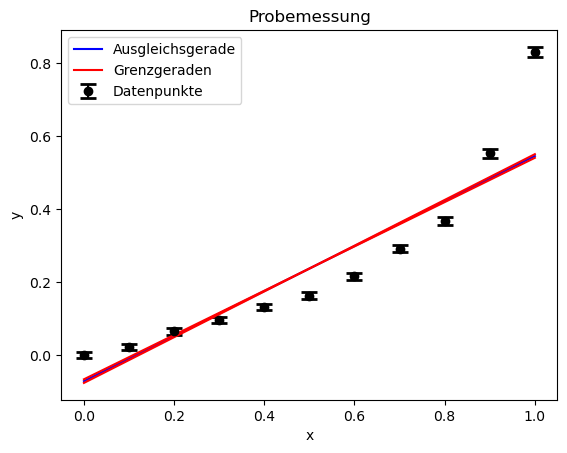

Der y-Achsenabschnitt beträgt -0.071 ± 0.005 .
Die Geradensteigung beträgt 0.617 ± 0.01 .
Das Bestimmtheitsmaß R^2 beträgt 83.5 .
Die Varianz beträgt 91.2 .


In [5]:
xwerte1,ywerte1=np.loadtxt('A2_belastet.txt',delimiter=',').T
xwerte=xwerte1/10
ywerte=ywerte1/6
yfehler=(0.006*ywerte1+0.05)/6

print("x-Werte:  ",xwerte)
print("y-Werte:  ",ywerte)
print("y-Fehler: ",yfehler)


xkoords=np.linspace(xwerte[0],xwerte[-1],100) #x-Wertliste für das Diagramm
#Messpunkte mit Fehlerbalken
plt.errorbar(xwerte,ywerte,yerr=yfehler,fmt="o",color="black",capsize=6,capthick=2,label="Datenpunkte")
plt.plot(xwerte,ywerte,color="blue",label="belastet")     #Ausgleichsgerade
 
plt.legend(loc="best")                                                  #Legende erstellen
plt.title("Probemessung")                                               #Titel erstellen
plt.xlabel("x")                                                         #Beschriftung der x-Achse
plt.ylabel("y")                                                         #Beschriftung der y-Achse
plt.show()                                                              #fertiges Diagramm zeigen




